In [2]:
import os,sys
import glob
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#(b)
folder_name = ["bending1","bending2","cycling","lying","sitting","standing","walking"]
testdata=[]
traindata=[]
bending_data=[]
nonbending_data=[]
for folder in folder_name:
    path = folder + "/*.csv"
    #print(path)
    path = glob.glob(path)
    #print(path)
    for file in path:
        #print(file)
        if "bending" in file:
            bending_data.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))
            #print("bending")
            if "dataset1." in file or "dataset2." in file:
                #print("in123")
                testdata.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))
            else:
                #print("not in123")
                traindata.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))
        else:
            nonbending_data.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))
            #print("not in ")
            if "dataset1." in file or "dataset2." in file or "dataset3." in file:
                testdata.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))
            else:
                traindata.append(pd.read_csv(file,skiprows = 4, usecols = [0,1,2,3,4,5,6]))

All_data = testdata + traindata
d_data = bending_data + nonbending_data

In [45]:
#(c)
#i
print("""minimum, maximum, mean, median, standard deviation, first quartile, and third quartile are usually used in time series classfication""")

minimum, maximum, mean, median, standard deviation, first quartile, and third quartile are usually used in time series classfication


In [26]:
#(c)
#ii
from sklearn.preprocessing import MinMaxScaler
table_header = ["min1", "max1","mean1","median1","std dev1","1st quart1","3rd quart1",
           "min2", "max2","mean2","median2","std dev2","1st quart2","3rd quart2",
           "min3", "max3","mean3","median3","std dev3","1st quart3","3rd quart3",
           "min4", "max4","mean4","median4","std dev4","1st quart4","3rd quart4",
           "min5", "max5","mean5","median5","std dev5","1st quart5","3rd quart5",
           "min6", "max6","mean6","median6","std dev6","1st quart6","3rd quart6",]
mini,maxi,mean,median,sta_dev,first_quart,third_quart,table_data=[],[],[],[],[],[],[],[]

for dataset in All_data:
    mini.append(list(dataset.min()[1:]))
    maxi.append(list(dataset.max()[1:]))
    mean.append(list(dataset.mean()[1:]))
    median.append(list(dataset.median()[1:]))
    sta_dev.append(list(dataset.std()[1:]))
    first_quart.append(list(dataset.quantile(q=0.25)[1:]))
    third_quart.append(list(dataset.quantile(q=0.75)[1:]))
    
rows=[[],[],[],[],[],[]]
#construct the table
for i in range(88):
    table_data.append([])
    for j in range(6):
        a=mini[i][j]
        b=maxi[i][j]
        c=mean[i][j]
        d=median[i][j]
        e=sta_dev[i][j]
        f=first_quart[i][j]
        g=third_quart[i][j]
    
        rows[j]=[a,b,c,d,e,f,g]
        table_data[i]+=rows[j]
    rows=[[],[],[],[],[],[]]
    
table_data=pd.DataFrame(table_data,columns=table_header)
nptable_data=table_data.values
DF_table_data = pd.DataFrame(table_data,columns=table_header)
#print(table_data)  
scaler = MinMaxScaler()
scaler.fit(table_data)
normalizd_table_data = scaler.transform(table_data)
DF_normalizd_table_data = pd.DataFrame(normalizd_table_data,columns=table_header)

In [44]:
#(c)
#iii
def bootstrap_data(data,alpha):
    bootstrap_time = 1000
    length = len(data)
    index = np.random.randint(0,length,size=(bootstrap_time,length))
    
    samples = data[index]
    
    stat = np.sort(np.std(samples,1))
    #print(samples.shape)
    return (stat[int((alpha/2)*bootstrap_time)], stat[int((1-alpha/2)*bootstrap_time)])

npCI=[]
normalizdCI=[]
for i in range(len(table_header)):
    npCI.append(bootstrap_data(nptable_data[:,i],0.1))
    normalizdCI.append(bootstrap_data(normalizd_table_data[:,i],0.1))
    
confidence_interval = npCI
normalizd_confidence_interval = normalizdCI
print("confidence_interval for each the standard deviation of each feature: ")
for i in range(len(confidence_interval)):
    print(confidence_interval[i])


confidence_interval for each the standard deviation of each feature: 
(8.17761592131278, 10.722527463069563)
(3.326097902920786, 5.255663227239847)
(4.673416887729973, 5.825020744941894)
(4.751611197761249, 5.960145969362708)
(1.5514907194919283, 1.943920745365119)
(5.567856189385689, 6.597145799962732)
(4.276372082382855, 5.7625815311611825)
(0.0, 0.0)
(4.610917961740015, 5.384454368895992)
(1.388927992298224, 1.6892975526702958)
(1.2415599098771068, 1.5397521038119033)
(0.802348610926071, 0.9298163467774274)
(0.8269265322079233, 1.0344965925012486)
(1.8884440128005329, 2.2759183958673623)
(2.745973413867917, 3.086980539414387)
(4.115692314895324, 5.476988355499854)
(3.436188216997714, 4.499942348888075)
(3.4376825754482176, 4.525617098334617)
(0.7560160082244399, 1.1067883452259875)
(3.6376122075221335, 4.686945852833741)
(3.5129571934704797, 4.69254897230045)
(0.0, 0.0)
(1.9687648595792362, 2.3457269458404895)
(1.0679155180859417, 1.2160615388356129)
(1.0468583398822362, 1.196793689

In [28]:
#(c)
#iv
print("""The three most important time-domain features are min, mean, and max""")

the three most important time-domain features are min, mean, and max


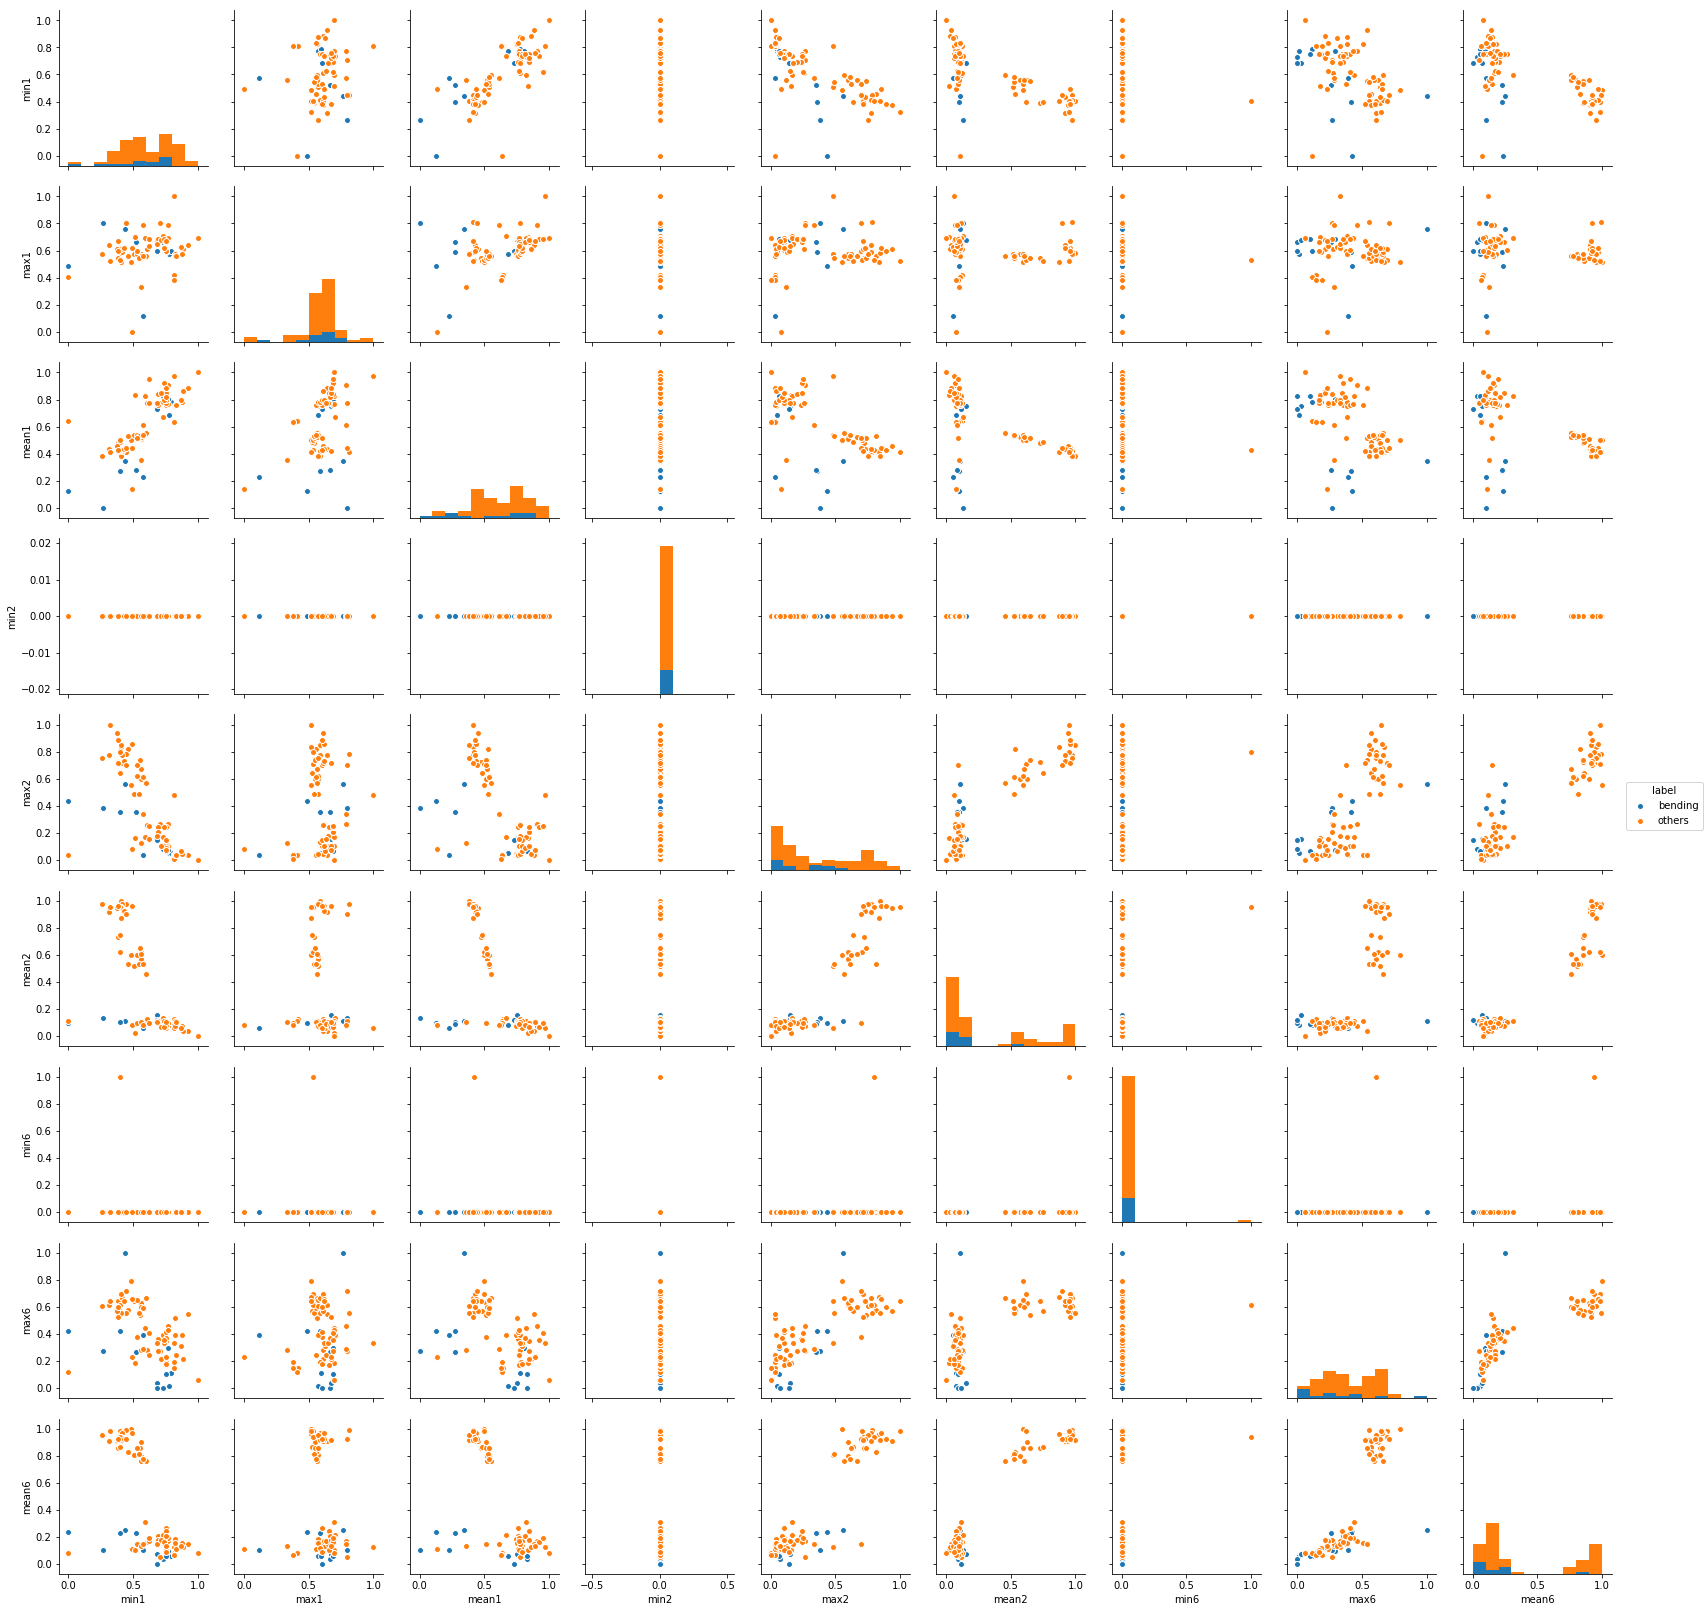

In [5]:
#(d)
#i
import seaborn as sns
#i
mini,maxi,mean,median,sta_dev,first_quart,third_quart,d_table_data=[],[],[],[],[],[],[],[]

for dataset in d_data:
    mini.append(list(dataset.min()[1:]))
    maxi.append(list(dataset.max()[1:]))
    mean.append(list(dataset.mean()[1:]))
    median.append(list(dataset.median()[1:]))
    sta_dev.append(list(dataset.std()[1:]))
    first_quart.append(list(dataset.quantile(q=0.25)[1:]))
    third_quart.append(list(dataset.quantile(q=0.75)[1:]))
    
rows=[[],[],[],[],[],[]]
#construct the table
for i in range(88):
    d_table_data.append([])
    for j in range(6):
        a=mini[i][j]
        b=maxi[i][j]
        c=mean[i][j]
        d=median[i][j]
        e=sta_dev[i][j]
        f=first_quart[i][j]
        g=third_quart[i][j]
    
        rows[j]=[a,b,c,d,e,f,g]
        d_table_data[i]+=rows[j]
    rows=[[],[],[],[],[],[]]
    
d_table_data=pd.DataFrame(d_table_data,columns=table_header)# 0,1,7,8 is test data
scaler = MinMaxScaler()
scaler.fit(d_table_data)
d_normalizd_table_data = scaler.transform(d_table_data)
d_DF_normalizd_table_data = pd.DataFrame(d_normalizd_table_data,columns=table_header)

label=[]
for i in range(88):
    if i<= 13:
        label.append("bending")
    else:
        label.append("others")
        
d_DF_normalizd_table_data["label"] = label
sns.pairplot(d_DF_normalizd_table_data.iloc[:,[0,1,2,7,8,9,35,36,37,42]], hue='label')
plt.show()

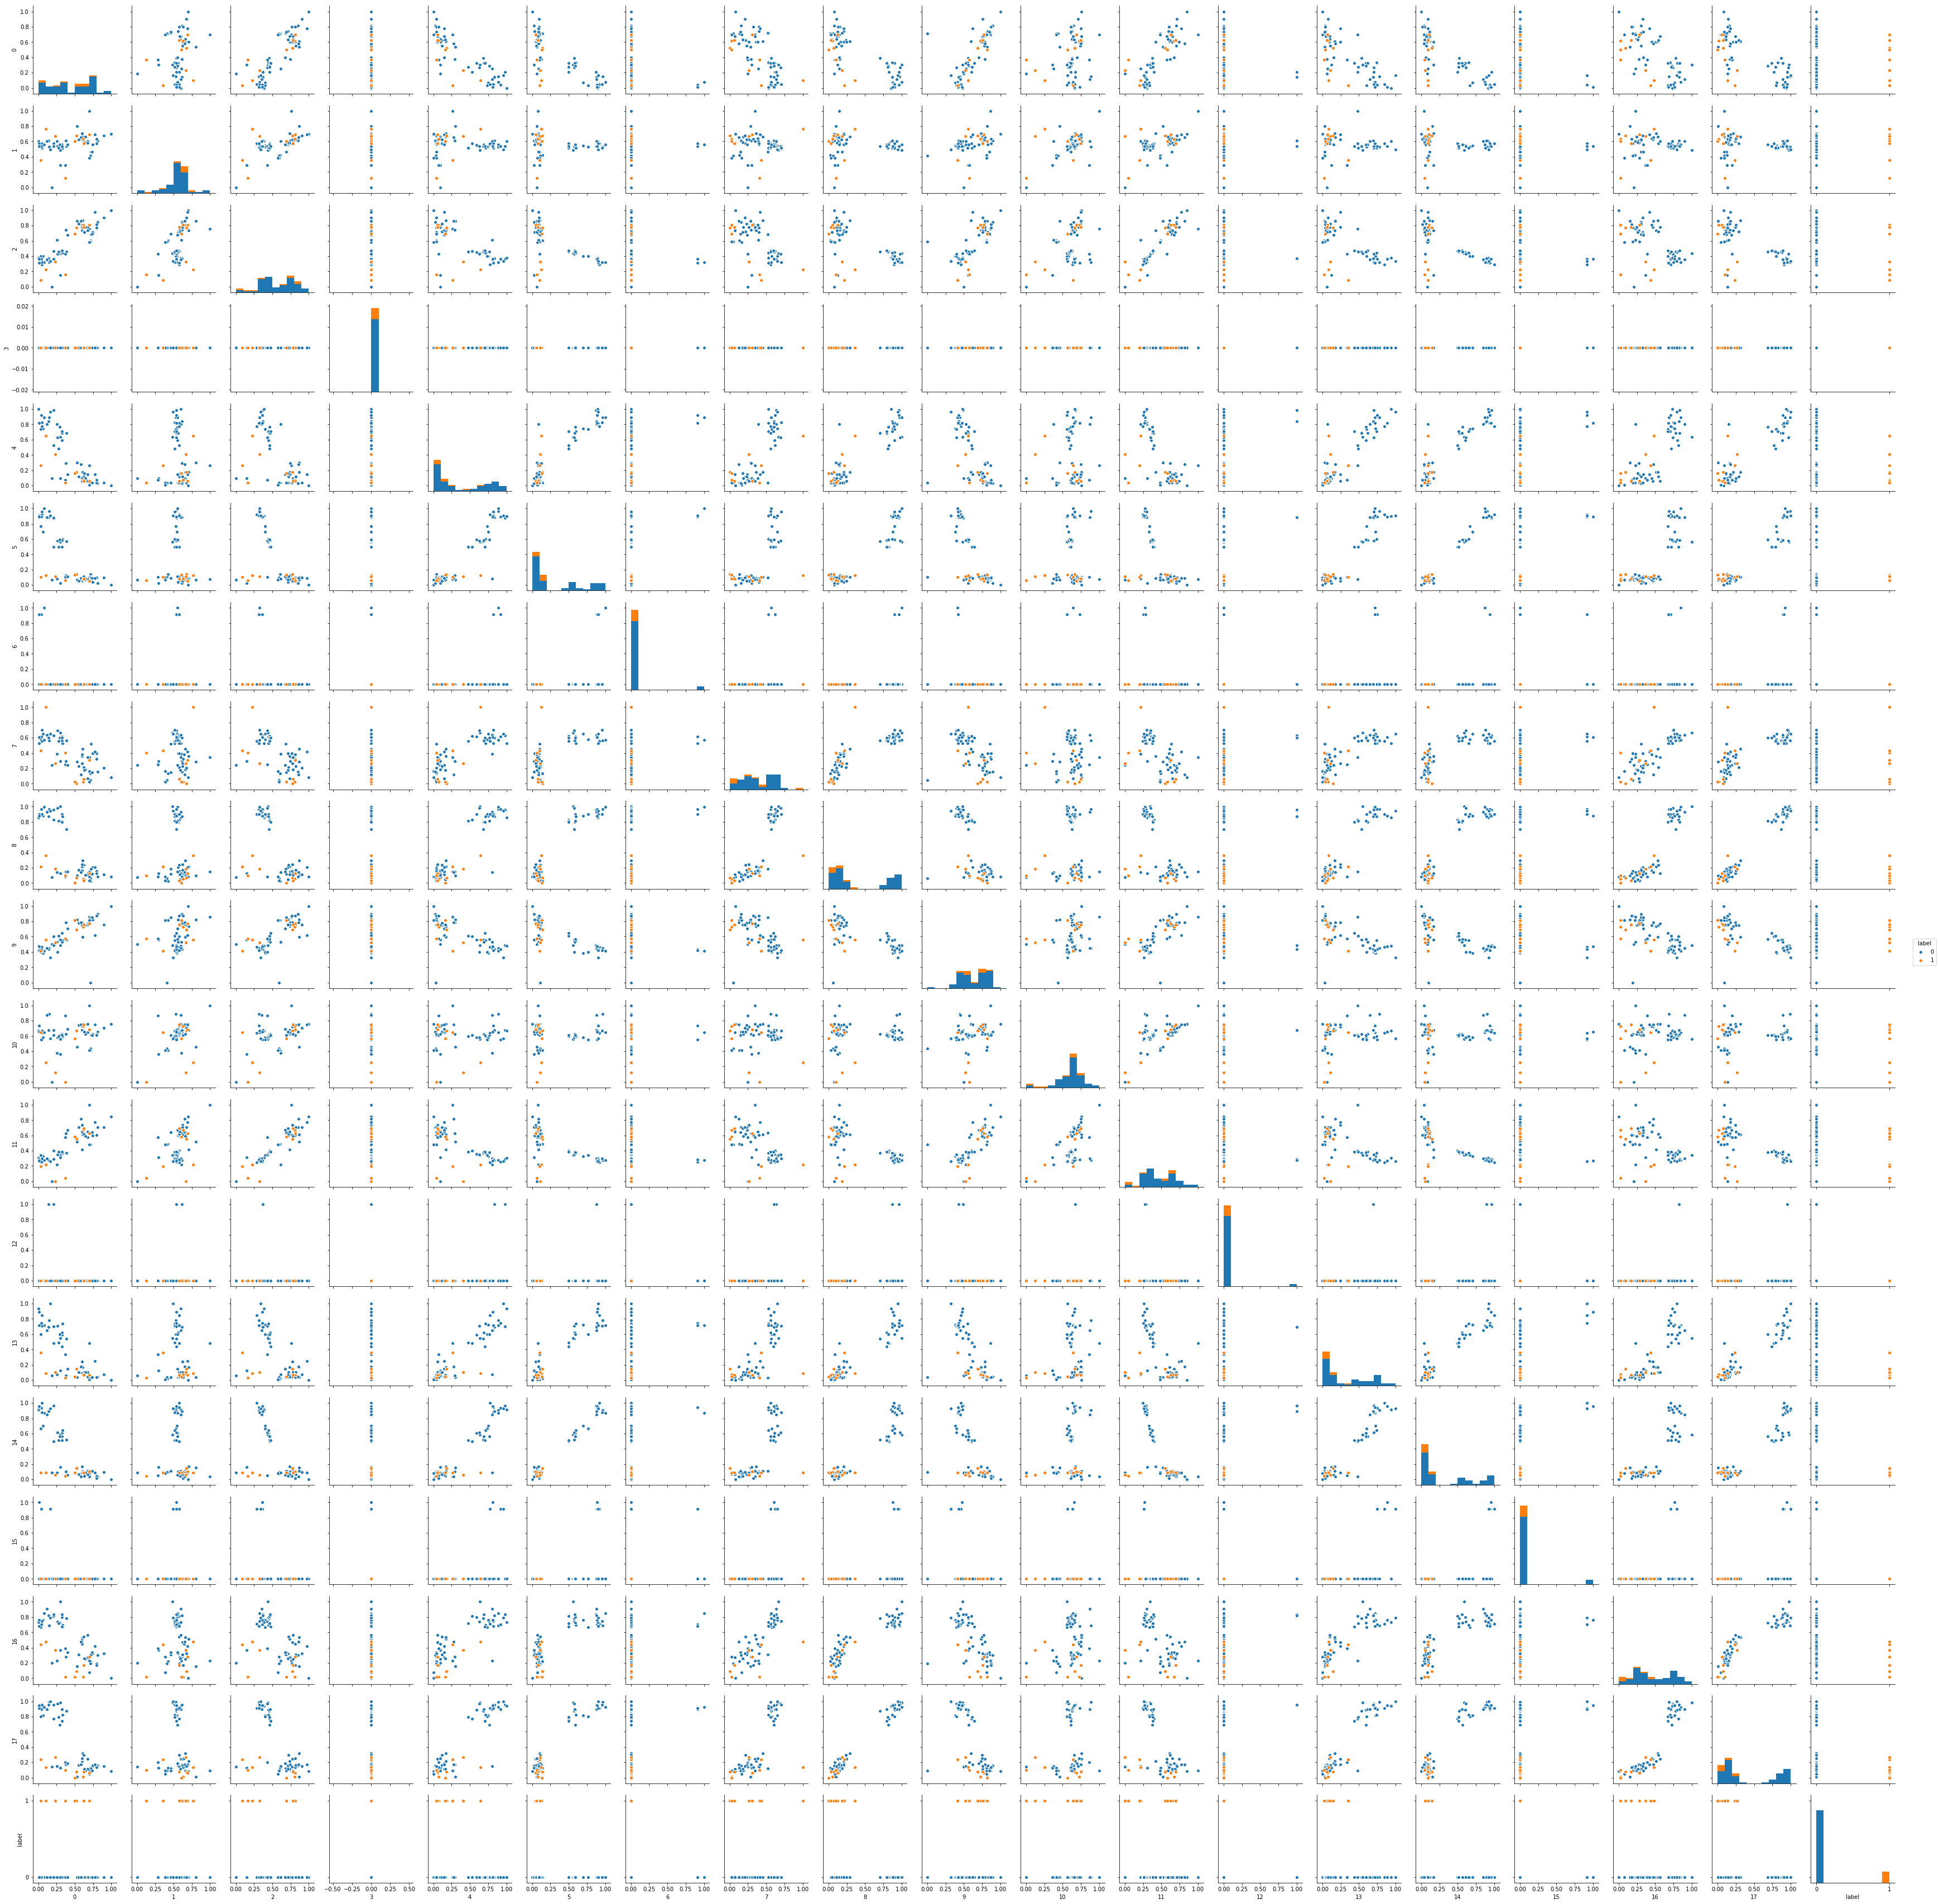

No, I did not see any considerable difference


In [7]:
#(d)
#ii
import math

sub_dataframe_list=[]
for dataframe in traindata:
    for slice_num in range(0,480,math.ceil(480/2)):
        sub_dataframe = dataframe[slice_num:slice_num+math.ceil(480/2)]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','var_rss23']])
    
d2_table_data=[]
d2_combination=[]
d2_rows=[]
for dataset in sub_dataframe_list:
    #print(dataset)
    for column in dataset:
        d2_combination.append(dataset[column].min())
        d2_combination.append(dataset[column].max())
        d2_combination.append(dataset[column].mean())
    
for i in range(0,len(d2_combination),9*2):#9*l
    d2_row=d2_combination[i:i+9*2]
    #print(d2_row)
    #d2_row.extend(d2_rows[i:i+2])
    d2_table_data.append(d2_row)

scaler = MinMaxScaler()
scaler.fit(d2_table_data)
d2_normalizd_table_data = scaler.transform(d2_table_data)

d2_DF_normalizd_table_data = pd.DataFrame(d2_normalizd_table_data)
d2_label=[]
for i in range(69):
    if i<= 8:
        d2_label.append("1")
    else:
        d2_label.append("0")
        
d2_DF_normalizd_table_data["label"] = d2_label
sns.pairplot(d2_DF_normalizd_table_data.iloc[:,:], hue='label')
plt.show()

print("No, I did not see any considerable difference")

In [30]:
#(d)
#iii
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
#l=5
d3_lscore=[]
lrange=[]
for l in range(1,21):
    lrange.append(l)
for l in lrange:
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    d3_table_data=[]
    d3_combination=[]
    d3_rows=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            d3_combination.append(dataset[column].min())
            d3_combination.append(dataset[column].max())
            d3_combination.append(dataset[column].mean())
            
    for i in range(0,len(d3_combination),18*l):#18*l
        d3_row=d3_combination[i:i+18*l]
        d3_table_data.append(d3_row)
        
    d3_table_data = pd.DataFrame(d3_table_data)
    #print(d3_table_data.mean().mean())
#    scaler = MinMaxScaler()
#    scaler.fit(d3_table_data)
#    d3_normalizd_table_data = scaler.transform(d3_table_data)
#    d3_normalizd_table_data = pd.DataFrame(d3_normalizd_table_data)
    
    d3_label=[]
    for i in range(69):
        if i<= 8:
            d3_label.append(1)
        else:
            d3_label.append(0)
            
    d3_table_data_X = d3_table_data
    #d3_nor_table_data_X = d3_normalizd_table_data
    d3_table_data["label"] = d3_label
    #d3_normalizd_table_data["label"] = d3_label
    skf = StratifiedKFold(n_splits=5)
    #skf.get_n_splits(d3_table_data, d3_table_data["label"])
    
    y_pred_score=[]
    for train_index, test_index in skf.split(d3_table_data_X, d3_table_data["label"]):
        X_train, X_test = d3_table_data_X.iloc[train_index], d3_table_data_X.iloc[test_index]
        Y_train, Y_test = d3_table_data["label"].iloc[train_index], d3_table_data["label"].iloc[test_index]
        model = LogisticRegression(C=10000)
        #find how many features should be use in rfe
        rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
        rfecv = rfecv.fit(X_train, Y_train)

        rfe = RFE(model,rfecv.n_features_)
        #print(rfecv.n_features_)
        rfe = rfe.fit(X_train, Y_train)
        #summarize the selection of the attributes
        #print(rfe.support_)
        #print(rfe.ranking_)
        X_train_transform = pd.DataFrame(rfe.transform(X_train))
        X_test_transform = pd.DataFrame(rfe.transform(X_test))

        response = model.fit(X_train_transform, Y_train)
        y_pred = response.predict(X_test_transform)
        y_pred_score.append(model.score(X_test_transform,Y_test))
        
    #print(y_pred_score)
    d3_lscore.append(max(y_pred_score))
    #print(lscore)
print("The Best L is: ",end='')
print(lrange[d3_lscore.index(max(d3_lscore))])
print("""Wrong way is use the feature seletion before cross validation. The right way is do the feature seletion after cross validation.""")
bestl = lrange[d3_lscore.index(max(d3_lscore))]

The Best L is: 1
Wrong way is use the feature seletion before cross validation. The right way is do the feature seletion after cross validation.


The confusion matrix: 
[[60  0]
 [ 0  9]]


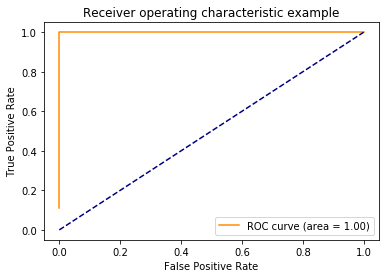

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     12.71
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           9.89e-13
Time:                        19:28:46   Log-Likelihood:                 32.101
No. Observations:                  69   AIC:                            -30.20
Df Residuals:                      52   BIC:                             7.778
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1667      0.338     -0.493      0.6

In [31]:
#(d)
#iv
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import svm
import statsmodels.api as sm #logtic
import statsmodels.formula.api as smf
import copy
import warnings
warnings.filterwarnings("ignore")

l=bestl
sub_dataframe_list=[]
for dataframe in traindata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
d4_table_data=[]
d4_combination=[]
for dataset in sub_dataframe_list:
    #print(dataset)
    for column in dataset:         
        d4_combination.append(dataset[column].min())
        d4_combination.append(dataset[column].max())
        d4_combination.append(dataset[column].mean())
        
for i in range(0,len(d4_combination),18*l):#18*l
    d4_row=d4_combination[i:i+18*l]
    d4_table_data.append(d4_row)
    
d4_table_data = pd.DataFrame(d4_table_data)
#print(d3_table_data.mean().mean())
#print(d3_table_data)
#    scaler = MinMaxScaler()
#    scaler.fit(d3_table_data)
#    d3_normalizd_table_data = scaler.transform(d3_table_data)
#    d3_normalizd_table_data = pd.DataFrame(d3_normalizd_table_data)

d4_label=[]
for i in range(69):
    if i< 9:
        d4_label.append(1)
    else:
        d4_label.append(0)
        
d4_table_data_X = d4_table_data
d4_label = pd.DataFrame(d4_label)
d4_label.columns=["label"]
#d3_nor_table_data_X = d3_normalizd_table_data
#d3_table_data["label"] = d3_label
#d3_normalizd_table_data["label"] = d3_label
skf = StratifiedKFold(n_splits=5)
#skf.get_n_splits(d3_table_data, d3_table_data["label"])

y_pred_score=[]
support=[]
y_pred_list=[]
Y_test_list,Y_train_list,X_test_list,X_train_list=[],[],[],[]

for train_index, test_index in skf.split(d4_table_data_X, d4_label):
    X_train, X_test = d4_table_data_X.iloc[train_index], d4_table_data_X.iloc[test_index]
    Y_train, Y_test = d4_label.iloc[train_index], d4_label.iloc[test_index]
    Y_test_list.append(Y_test)
    Y_train_list.append(Y_train)
    X_train_list.append(X_train)
    model = LogisticRegression(C=10000)
    #find how many features should be use in rfe
    rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
    rfecv = rfecv.fit(X_train, Y_train)

    rfe = RFE(model,rfecv.n_features_)
    #print(rfecv.n_features_)
    rfe = rfe.fit(X_train, Y_train)
    #summarize the selection of the attributes
    #print(rfe.support_)
    support.append(rfe.support_)
    #print(support)
    #print(rfe.ranking_)
    X_train_transform = pd.DataFrame(rfe.transform(X_train))
    X_test_transform = pd.DataFrame(rfe.transform(X_test))
    X_test_list.append(X_test_transform)
    X_train_list.append(X_train_transform)
    
    response = model.fit(X_train_transform, Y_train)
    y_pred = response.predict(X_test_transform)
    y_pred_list.append(y_pred)
    y_pred_score.append(model.score(X_test_transform,Y_test))
    
 
max_accuracy_index = y_pred_score.index(max(y_pred_score))
#print(max_acc_index)

d4_feature=[]
for i in range(len(support[max_accuracy_index])):
    if support[max_accuracy_index][i]==True:
        d4_feature.append(i)
#print(feature)
y_pred = y_pred_list[max_accuracy_index]
Y_test = Y_test_list[max_accuracy_index]
Y_train = Y_train_list[max_accuracy_index]
X_test_transform = X_test_list[max_accuracy_index]
X_train_transform = X_train_list[max_accuracy_index]
#print(y_pred_score)


response = model.fit(X_train_transform, Y_train)
y_score = model.decision_function(d4_table_data_X)
y_pred = response.predict(d4_table_data_X)
print("The confusion matrix: ")
print(confusion_matrix(d4_label, y_pred))
#y_score = model.decision_function(d4_DF_normalizd_table_data_X)
#print(y_score)

fpr, tpr, threshold = roc_curve(d4_label, y_score)
roc_auc = auc(fpr,tpr)
#print(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#parameters and p-value

d4_header = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","label"]
d4_table_dataXY = copy.copy(d4_table_data_X)
d4_table_dataXY["label"]= d4_label
d4_table_dataXY.columns = d4_header
response_ols = smf.ols(formula='label ~ a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r', data=d4_table_dataXY).fit()
print(response_ols.summary())
#print(response_ols.params)

In [32]:
#(d)
#v
l=bestl
sub_dataframe_list=[]
for dataframe in testdata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])

d5_table_data=[]
d5_combination=[]
for dataset in sub_dataframe_list:
    #print(dataset)
    for column in dataset:         
        d5_combination.append(dataset[column].min())
        d5_combination.append(dataset[column].max())
        d5_combination.append(dataset[column].mean())
        
for i in range(0,len(d5_combination),18*l):#18*l
    d5_row=d5_combination[i:i+18*l]
    d5_table_data.append(d5_row)
    
d5_table_data = pd.DataFrame(d5_table_data)

d5_label=[]
for i in range(19):
    if i< 4:
        d5_label.append(1)
    else:
        d5_label.append(0)
        
d5_table_data_X = d5_table_data
d5_label = pd.DataFrame(d5_label)
d5_label.columns=["label"]

d5_Xtest = d5_table_data_X[d4_feature]
y_pred = response.predict(d5_Xtest)
d5_accuracy = model.score(d5_Xtest,d5_label)
print("The accuracy on the test set is: ", end='')
print(d5_accuracy)
print("The cross-validation accuracy I obtained previously is: ", end='')
print(max(y_pred_score))

The accuracy on the test set is: 1.0
The cross-validation accuracy I obtained previously is: 1.0


In [33]:
#(d)
#vi
print("No, according to the confusion matrix, classes seem to not be well-separated to cause instability")

No, according to the confusion matrix, classes seem to not be well-separated to cause instability


Yes, I see imbalanced classes
The Best L is: 1
The confusion matrix: 
[[60  0]
 [ 0 60]]


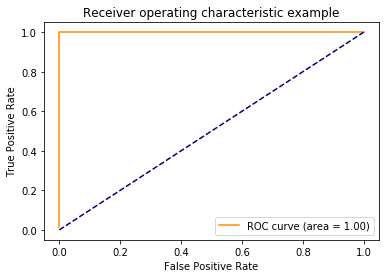

In [34]:
#(d)
#vii
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
print("Yes, I see imbalanced classes")
d7_lscore=[]
for l in range(1,21):
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    d7_table_data=[]
    d7_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            d7_combination.append(dataset[column].min())
            d7_combination.append(dataset[column].max())
            d7_combination.append(dataset[column].mean())
            
    for i in range(0,len(d7_combination),18*l):#18*l
        d7_row=d7_combination[i:i+18*l]
        d7_table_data.append(d7_row)
        
    d7_table_data = pd.DataFrame(d7_table_data)
    
#    scaler = MinMaxScaler()
#    scaler.fit(d3_table_data)
#    d3_normalizd_table_data = scaler.transform(d3_table_data)
#    d3_normalizd_table_data = pd.DataFrame(d3_normalizd_table_data)
    
    d7_label=[]
    for i in range(69):
        if i<= 8:
            d7_label.append(1)
        else:
            d7_label.append(0)
    
    d7_table_data_X = d7_table_data
    d7_label = pd.DataFrame(d7_label)
    d7_label.columns=["label",]
    
    getSmote = SMOTE(random_state = 5)
    d7_Xtrain, d7_Ytrain = getSmote.fit_sample(d7_table_data_X, d7_label)
    d7_Xtrain = pd.DataFrame(d7_Xtrain)
    d7_Ytrain = pd.DataFrame(d7_Ytrain)
    
    skf = StratifiedKFold(n_splits=5)
    y_pred_score=[]
    support=[]
    y_pred_list=[]
    Y_test_list,Y_train_list,X_test_list,X_train_list=[],[],[],[]
    
    for train_index, test_index in skf.split(d7_Xtrain, d7_Ytrain):
        X_train, X_test = d7_Xtrain.iloc[train_index], d7_Xtrain.iloc[test_index]
        Y_train, Y_test = d7_Ytrain.iloc[train_index], d7_Ytrain.iloc[test_index]
        Y_test_list.append(Y_test)
        Y_train_list.append(Y_train)
        X_train_list.append(X_train)
        model = LogisticRegression(C=10000)
        #find how many features should be use in rfe
        rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
        rfecv = rfecv.fit(X_train, Y_train)
    
        rfe = RFE(model,rfecv.n_features_)
        #print(rfecv.n_features_)
        rfe = rfe.fit(X_train, Y_train)
        #summarize the selection of the attributes
        #print(rfe.support_)
        support.append(rfe.support_)
        #print(support)
        #print(rfe.ranking_)
        X_train_transform = pd.DataFrame(rfe.transform(X_train))
        X_test_transform = pd.DataFrame(rfe.transform(X_test))
        X_test_list.append(X_test_transform)
        X_train_list.append(X_train_transform)
        
        response = model.fit(X_train_transform, Y_train)
        y_pred = response.predict(X_test_transform)
        y_pred_list.append(y_pred)
        y_pred_score.append(model.score(X_test_transform,Y_test))
        
     
    d7_lscore.append(max(y_pred_score))
    #print(lscore)
print("The Best L is: ",end='')
print(lrange[d7_lscore.index(max(d7_lscore))])

l=lrange[d7_lscore.index(max(d7_lscore))]
sub_dataframe_list=[]
for dataframe in traindata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
d7_table_data=[]
d7_combination=[]
for dataset in sub_dataframe_list:
    #print(dataset)
    for column in dataset:         
        d7_combination.append(dataset[column].min())
        d7_combination.append(dataset[column].max())
        d7_combination.append(dataset[column].mean())
        
for i in range(0,len(d7_combination),18*l):#18*l
    d7_row=d7_combination[i:i+18*l]
    d7_table_data.append(d7_row)
    
d7_table_data = pd.DataFrame(d7_table_data)
#print(d3_table_data)
#    scaler = MinMaxScaler()
#    scaler.fit(d3_table_data)
#    d3_normalizd_table_data = scaler.transform(d3_table_data)
#    d3_normalizd_table_data = pd.DataFrame(d3_normalizd_table_data)

d7_label=[]
for i in range(69):
    if i< 9:
        d7_label.append(1)
    else:
        d7_label.append(0)
        
d7_table_data_X = d7_table_data
d7_label = pd.DataFrame(d7_label)
d7_label.columns=["label"]

getSmote = SMOTE(random_state = 5)
d7_Xtrain, d7_Ytrain = getSmote.fit_sample(d7_table_data_X, d7_label)
d7_Xtrain = pd.DataFrame(d7_Xtrain)
d7_Ytrain = pd.DataFrame(d7_Ytrain)

skf = StratifiedKFold(n_splits=5)

y_pred_score=[]
support=[]
y_pred_list=[]
Y_test_list,Y_train_list,X_test_list,X_train_list=[],[],[],[]

for train_index, test_index in skf.split(d7_Xtrain, d7_Ytrain):
    X_train, X_test = d7_Xtrain.iloc[train_index], d7_Xtrain.iloc[test_index]
    Y_train, Y_test = d7_Ytrain.iloc[train_index], d7_Ytrain.iloc[test_index]
    Y_test_list.append(Y_test)
    Y_train_list.append(Y_train)
    X_train_list.append(X_train)
    model = LogisticRegression(C=10000)
    #find how many features should be use in rfe
    rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
    rfecv = rfecv.fit(X_train, Y_train)

    rfe = RFE(model,rfecv.n_features_)
    #print(rfecv.n_features_)
    rfe = rfe.fit(X_train, Y_train)
    #summarize the selection of the attributes
    #print(rfe.support_)
    support.append(rfe.support_)
    #print(support)
    #print(rfe.ranking_)
    X_train_transform = pd.DataFrame(rfe.transform(X_train))
    X_test_transform = pd.DataFrame(rfe.transform(X_test))
    X_test_list.append(X_test_transform)
    X_train_list.append(X_train_transform)
    
    response = model.fit(X_train_transform, Y_train)
    y_pred = response.predict(X_test_transform)
    y_pred_list.append(y_pred)
    y_pred_score.append(model.score(X_test_transform,Y_test))
    

max_accuracy_index = y_pred_score.index(max(y_pred_score))
d7_feature=[]
for i in range(len(support[max_accuracy_index])):
    if support[max_accuracy_index][i]==True:
        d7_feature.append(i)
#print(feature)
y_pred = y_pred_list[max_accuracy_index]
Y_test = Y_test_list[max_accuracy_index]
Y_train = Y_train_list[max_accuracy_index]
X_test_transform = X_test_list[max_accuracy_index]
X_train_transform = X_train_list[max_accuracy_index]
#print(y_pred_score)

response = model.fit(X_train_transform, Y_train)
y_score = model.decision_function(d7_Xtrain)
y_pred = response.predict(d7_Xtrain)
print("The confusion matrix: ")
print(confusion_matrix(d7_Ytrain, y_pred))

fpr, tpr, threshold = roc_curve(d7_Ytrain, y_score)
roc_auc = auc(fpr,tpr)
#print(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
#(e)
#i
from sklearn.linear_model import LogisticRegressionCV
lrange=[]

train_errors_rate = []
for l in range(1,21):
    lrange.append(l)
for l in lrange:
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    e1_table_data=[]
    e1_combination=[]
    e1_rows=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            e1_combination.append(dataset[column].min())
            e1_combination.append(dataset[column].max())
            e1_combination.append(dataset[column].mean())
            
    for i in range(0,len(e1_combination),18*l):#18*l
        e1_row=e1_combination[i:i+18*l]
        e1_table_data.append(e1_row)
        
    e1_table_data = pd.DataFrame(e1_table_data)
    #print(d3_table_data.mean().mean())
#    scaler = MinMaxScaler()
#    scaler.fit(d3_table_data)
#    d3_normalizd_table_data = scaler.transform(d3_table_data)
#    d3_normalizd_table_data = pd.DataFrame(d3_normalizd_table_data)
    
    e1_label=[]
    for i in range(69):
        if i<= 8:
            e1_label.append(1)
        else:
            e1_label.append(0)
            
    e1_table_data_X = e1_table_data
    #d3_nor_table_data_X = d3_normalizd_table_data
    e1_table_data["label"] = e1_label

    model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'liblinear', multi_class = 'ovr')
    response = model.fit(e1_table_data_X,e1_label)
    y_pred = response.predict(e1_table_data_X)
    
    error_num = float((e1_label != y_pred).sum())
    error_rate = (error_num * 1.0 / len(e1_label))
    train_errors_rate.append(error_rate)

print("The Best L is: ",end='')
print(lrange[train_errors_rate.index(min(train_errors_rate))])

The Best L is: 1


In [48]:
#(e)
#ii
print("""L1-penalized performs better, and it is easier to implement, because L1-penalized get rid of the insignificance coefficients. Variable selection using p-values has to run everything again for the best L to find the best model. """)

L1-penalized performs better, and it is easier to implement, because L1-penalized get rid of the insignificance coefficients. Variable selection using p-values has to run everything again for the best L to find the best model. 


The Best L is: 1
test_error_rate is : 0.15789473684210525
The confusion matrix: 
[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


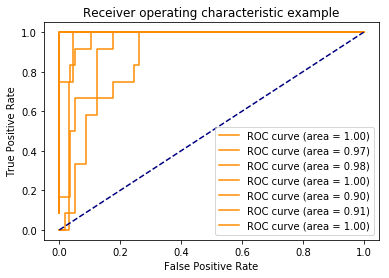

In [49]:
#(f)
#i
f_train_label=[]
f_test_label=[]
for i in range(69):
    if i < 5:
        f_train_label.append(1)
    elif i >= 5 and i < 9:
        f_train_label.append(2)
    elif i >= 9 and i < 21:
        f_train_label.append(3)
    elif i >= 21 and i < 33:
        f_train_label.append(4)
    elif i >= 33 and i < 45:
        f_train_label.append(5)
    elif i >= 45 and i < 57:
        f_train_label.append(6)
    elif i >= 57 and i < 69:
        f_train_label.append(7)
        
for i in range(19):
    if i < 2:
        f_test_label.append(1)
    elif i >= 2 and i < 4:
        f_test_label.append(2)
    elif i >= 4 and i < 7:
        f_test_label.append(3)
    elif i >= 7 and i < 10:
        f_test_label.append(4)
    elif i >= 10 and i < 13:
        f_test_label.append(5)
    elif i >= 13 and i < 16:
        f_test_label.append(6)
    elif i >= 16 and i < 19:
        f_test_label.append(7)
        
#print(f_test_label)
#print(f_train_label)
        
from sklearn.linear_model import LogisticRegressionCV
lrange=[]

train_errors_rate = []
for l in range(1,21):
    lrange.append(l)
for l in lrange:
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    f1_table_data=[]
    f1_combination=[]
    f1_rows=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_table_data_X = f1_table_data
    #d3_nor_table_data_X = d3_normalizd_table_data

    model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'saga', multi_class = 'multinomial')
    response = model.fit(f1_table_data_X,f_train_label)
    y_pred = response.predict(f1_table_data_X)
    
    error_num = float((f_train_label != y_pred).sum())
    error_rate = (error_num * 1.0 / len(f_train_label))
    train_errors_rate.append(error_rate)

print("The Best L is: ",end='')
print(lrange[train_errors_rate.index(min(train_errors_rate))])

f_bestl = lrange[train_errors_rate.index(min(train_errors_rate))]
sub_dataframe_list=[]
l=f_bestl
#train_data
for dataframe in traindata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_train_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data

#test_data
sub_dataframe_list=[]
for dataframe in testdata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_test_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data



model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'saga', multi_class = 'multinomial')
response = model.fit(f1_train_X,f_train_label)
test_pred = response.predict(f1_test_X)
train_pred = response.predict(f1_train_X)

error_num = float((f_test_label != test_pred).sum())
test_error_rate = (error_num * 1.0 / len(f_test_label))
print("test_error_rate is : ",end='')
print(test_error_rate)

y_score = model.decision_function(f1_train_X)

print("The confusion matrix: ")
print(confusion_matrix(f_train_label, train_pred))
print(confusion_matrix(f_test_label, test_pred))

plt.figure()
for i in range(7):
    fpr, tpr, threshold = roc_curve(f_train_label, y_score[:,i], pos_label=i+1)
    roc_auc = auc(fpr,tpr)
    #print(fpr,tpr)
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The Best L is for Gaussian: 2
test_error_rate for Gaussian: 0.05263157894736842
The confusion matrix: 
[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


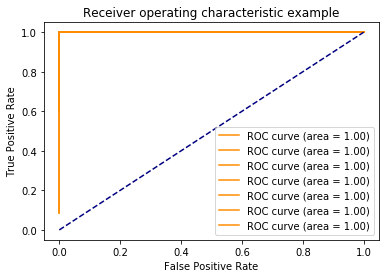

The Best L is for multi nomial: 14
test_error_rate for multi nomial: 0.2631578947368421
The confusion matrix: 
[[ 5  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  1 11  0  0]
 [ 0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0 12]]
[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]


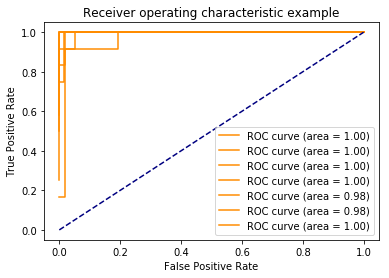

In [50]:
#(f)
#ii
#Gaussian
from sklearn.naive_bayes import GaussianNB

lrange=[]

train_errors_rate = []
for l in range(1,21):
    lrange.append(l)
for l in lrange:
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    f1_table_data=[]
    f1_combination=[]
    f1_rows=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_table_data_X = f1_table_data
    #d3_nor_table_data_X = d3_normalizd_table_data

    model = GaussianNB()
    response = model.fit(f1_table_data_X,f_train_label)
    y_pred = response.predict(f1_table_data_X)
    
    error_num = float((f_train_label != y_pred).sum())
    error_rate = (error_num * 1.0 / len(f_train_label))
    train_errors_rate.append(error_rate)

print("The Best L is for Gaussian: ",end='')
print(lrange[train_errors_rate.index(min(train_errors_rate))])

f_bestl = lrange[train_errors_rate.index(min(train_errors_rate))]
sub_dataframe_list=[]
l=f_bestl
#train_data
for dataframe in traindata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_train_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data

#test_data
sub_dataframe_list=[]
for dataframe in testdata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_test_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data



model = GaussianNB()
response = model.fit(f1_train_X,f_train_label)
test_pred = response.predict(f1_test_X)
train_pred = response.predict(f1_train_X)

error_num = float((f_test_label != test_pred).sum())
test_error_rate = (error_num * 1.0 / len(f_test_label))
print("test_error_rate for Gaussian: ",end='')
print(test_error_rate)

y_score = model.predict_proba(f1_train_X)

print("The confusion matrix: ")
print(confusion_matrix(f_train_label, train_pred))
print(confusion_matrix(f_test_label, test_pred))

plt.figure()
for i in range(7):
    fpr, tpr, threshold = roc_curve(f_train_label, y_score[:,i], pos_label=i+1)
    roc_auc = auc(fpr,tpr)
    #print(fpr,tpr)
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#Multi nomial
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")
lrange=[]

train_errors_rate = []
for l in range(1,21):
    lrange.append(l)
for l in lrange:
    sub_dataframe_list=[]
    
    for dataframe in traindata:
        for slice_num in range(0,480,int(480/l)+1):
            sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
            sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
            
    f1_table_data=[]
    f1_combination=[]
    f1_rows=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_table_data_X = f1_table_data
    #d3_nor_table_data_X = d3_normalizd_table_data

    model = MultinomialNB()
    response = model.fit(f1_table_data_X,f_train_label)
    y_pred = response.predict(f1_table_data_X)
    
    error_num = float((f_train_label != y_pred).sum())
    error_rate = (error_num * 1.0 / len(f_train_label))
    train_errors_rate.append(error_rate)

print("The Best L is for multi nomial: ",end='')
print(lrange[train_errors_rate.index(min(train_errors_rate))])

f_bestl = lrange[train_errors_rate.index(min(train_errors_rate))]
sub_dataframe_list=[]
l=f_bestl
#train_data
for dataframe in traindata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_train_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data

#test_data
sub_dataframe_list=[]
for dataframe in testdata:
    for slice_num in range(0,480,int(480/l)+1):
        sub_dataframe = dataframe[slice_num:slice_num+int(480/l)+1]
        sub_dataframe_list.append(sub_dataframe[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])
        
    f1_table_data=[]
    f1_combination=[]
    for dataset in sub_dataframe_list:
        #print(dataset)
        for column in dataset:         
            f1_combination.append(dataset[column].min())
            f1_combination.append(dataset[column].max())
            f1_combination.append(dataset[column].mean())
            
    for i in range(0,len(f1_combination),18*l):#18*l
        f1_row=f1_combination[i:i+18*l]
        f1_table_data.append(f1_row)
        
    f1_table_data = pd.DataFrame(f1_table_data)
            
    f1_test_X = f1_table_data
#d3_nor_table_data_X = d3_normalizd_table_data



model = MultinomialNB()
response = model.fit(f1_train_X,f_train_label)
test_pred = response.predict(f1_test_X)
train_pred = response.predict(f1_train_X)

error_num = float((f_test_label != test_pred).sum())
test_error_rate = (error_num * 1.0 / len(f_test_label))
print("test_error_rate for multi nomial: ",end='')
print(test_error_rate)

y_score = model.predict_proba(f1_train_X)

print("The confusion matrix: ")
print(confusion_matrix(f_train_label, train_pred))
print(confusion_matrix(f_test_label, test_pred))

plt.figure()
for i in range(7):
    fpr, tpr, threshold = roc_curve(f_train_label, y_score[:,i], pos_label=i+1)
    roc_auc = auc(fpr,tpr)
    #print(fpr,tpr)
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
#(f)
#iii
print("Using Gaussian is better base on the test error rate")

Using Gaussian is better base on the test error rate


3.ISLR 4.7.3
4.ISLR 4.7.7
are both on pdf file attached